# Теплов Андрей, 5030102/10201

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from scipy import stats
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve

# Загрузка датасета

In [2]:
# Загрузка данных
df = pd.read_csv('data.csv')
df.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


In [3]:
# Определим размеры датасета
print(df.shape)

# Сделаем столбец 'id' индексом данных
df = df.set_index('id', drop=True)

# Вывод первых строк DataFrame для проверки
df.head()

(42100, 19)


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
id,,,,,,,,,,,,,,,,,,
0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


# Обработка пропущенных значений

In [4]:
# Проверка пропущенных значений
all_data_na = (df.isnull().sum() / len(df)) * 100

# Удаление признаков без пропущенных значений и сортировка по убыванию
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index)

# Проверка, остались ли признаки после фильтрации
if not all_data_na.empty:
    all_data_na = all_data_na.sort_values(ascending=False)
    missing_data = pd.DataFrame({'Missing Ratio': all_data_na})

    print(missing_data)

    # Построение графика
    f, ax = plt.subplots(figsize=(15, 12))
    plt.xticks(rotation='vertical')
    sns.barplot(x=all_data_na.index, y=all_data_na)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
else:
    print("Нет признаков с пропущенными значениями.")

Нет признаков с пропущенными значениями.


# Обзор признаков, построения графиков зависимостей.

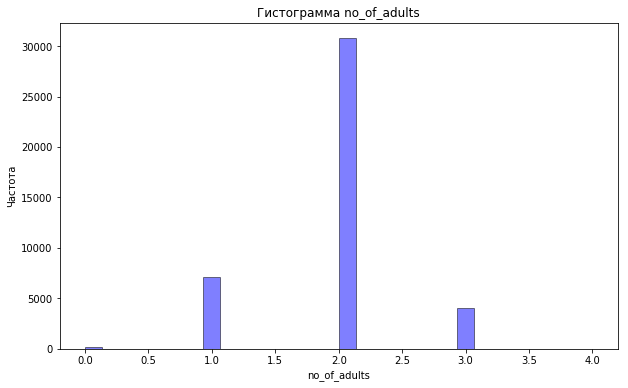

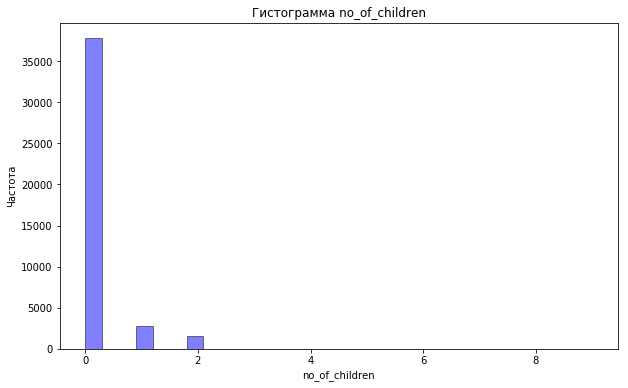

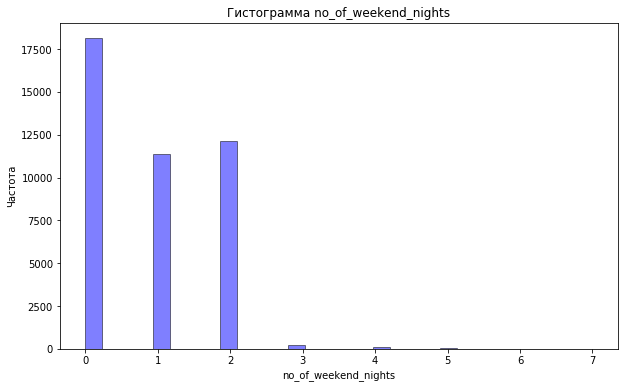

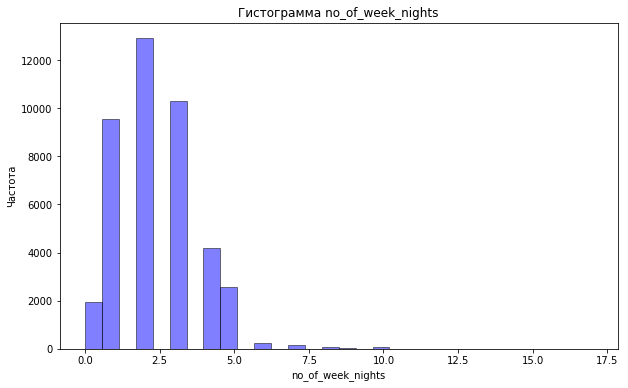

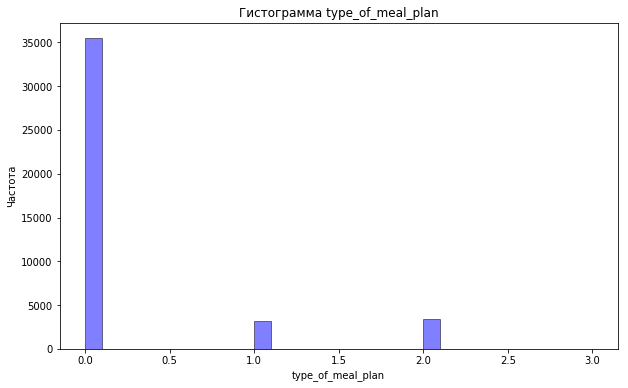

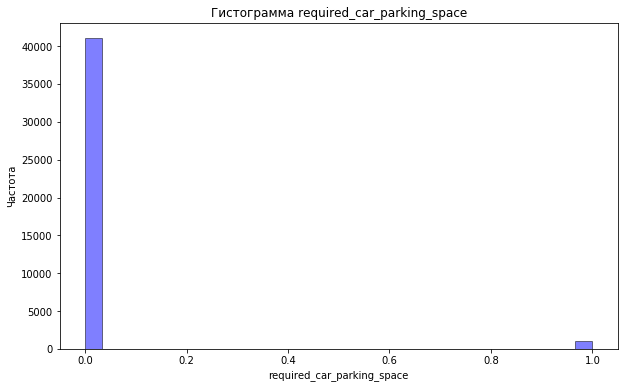

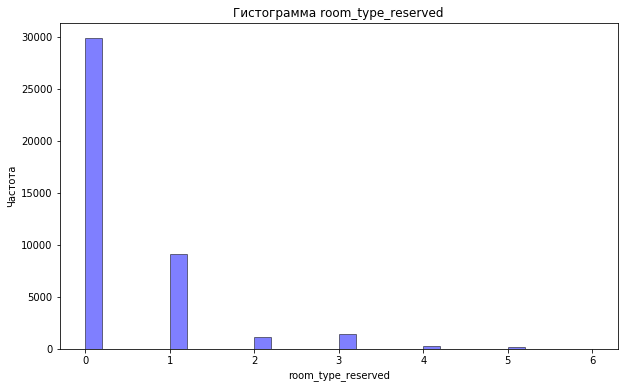

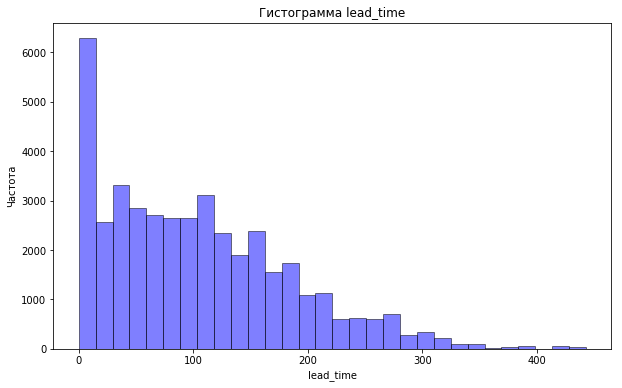

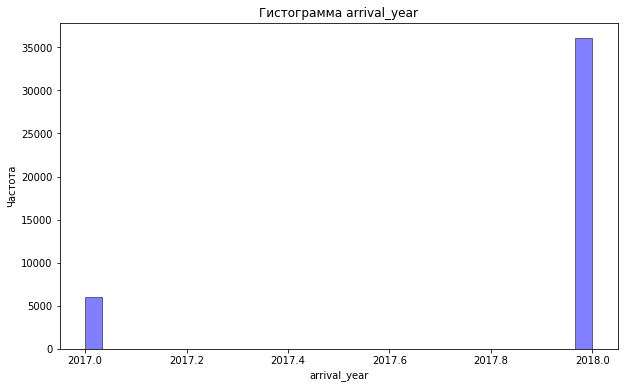

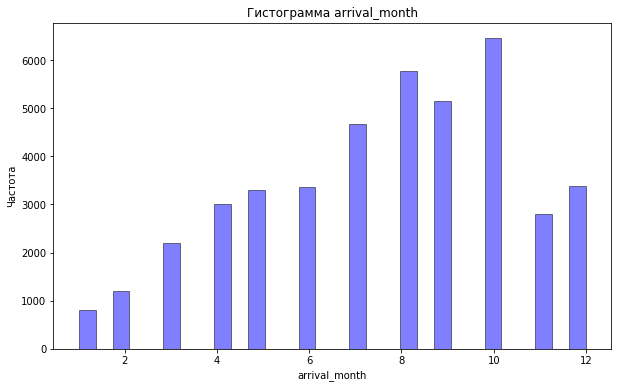

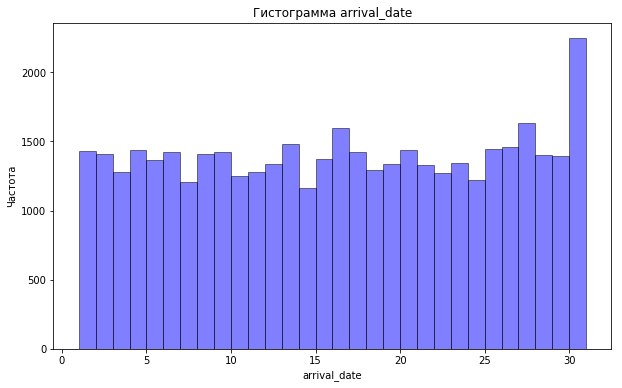

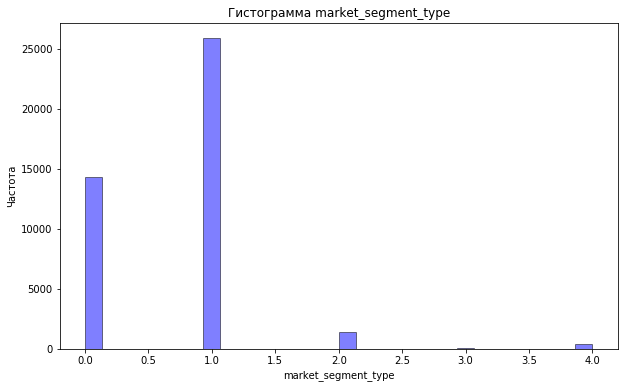

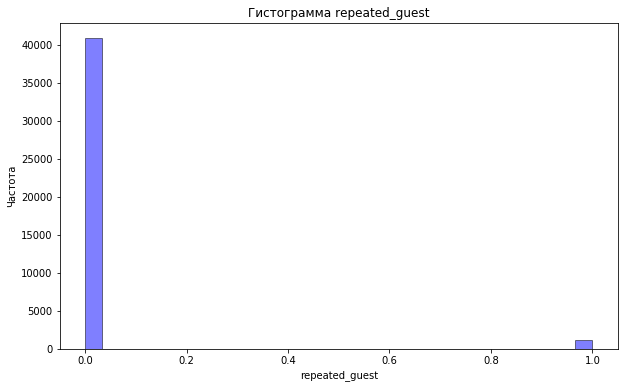

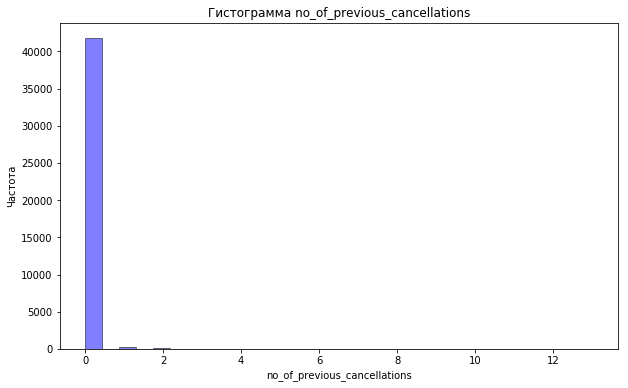

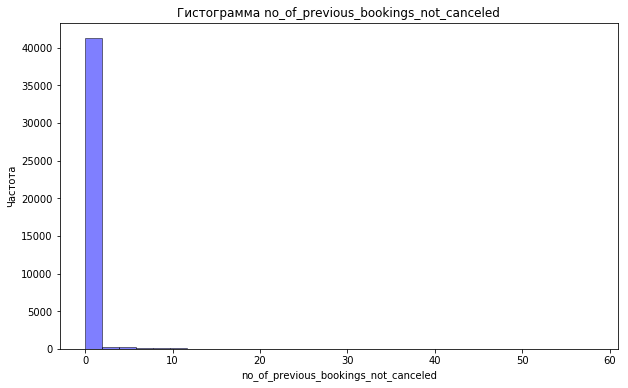

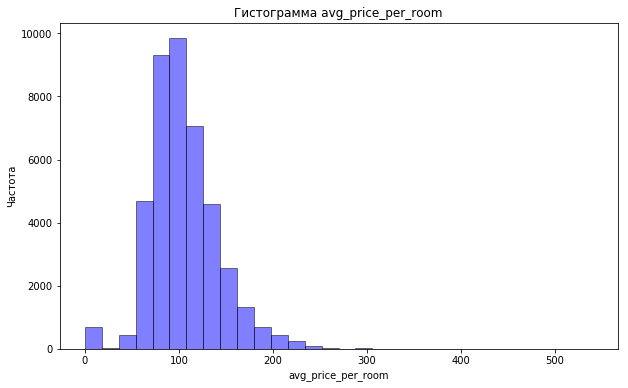

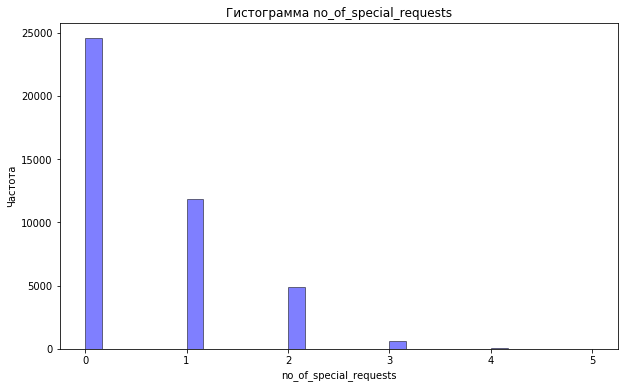

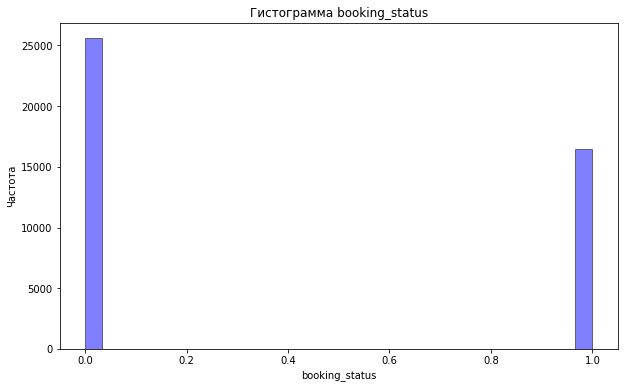

In [5]:
# Устанавливаем количество графиков (здесь 18)
num_graphs = min(len(df.columns), 18)  # Если колонок меньше 18, ограничиваем

for i in range(num_graphs):
    # Создаем новое окно для каждого графика
    plt.figure(figsize=(10, 6))
    
    # Строим гистограмму для визуализации распределения значений
    plt.hist(df.iloc[:, i], bins=30, alpha=0.5, color='blue', edgecolor='black')  # Используем hist
    plt.title(f'Гистограмма {df.columns[i]}')
    plt.xlabel(df.columns[i])
    plt.ylabel('Частота')
    
    # Отображаем график
    plt.show()

# Пауза между графиками (опционально)
plt.pause(0.5)

# Обзор целевой переменной.

In [6]:
# Обзор целевой переменной
df['booking_status'].describe()

count    42100.000000
mean         0.392019
std          0.488207
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: booking_status, dtype: float64

# Построим матрицу корреляция для признаков модели.

- Первая матрица отображает коэф. корреляции попарно между всеми признаками
- Вторая матрица отображает 5 наиболее кореллируемых величин по отношению к целевому значению(booking_status)

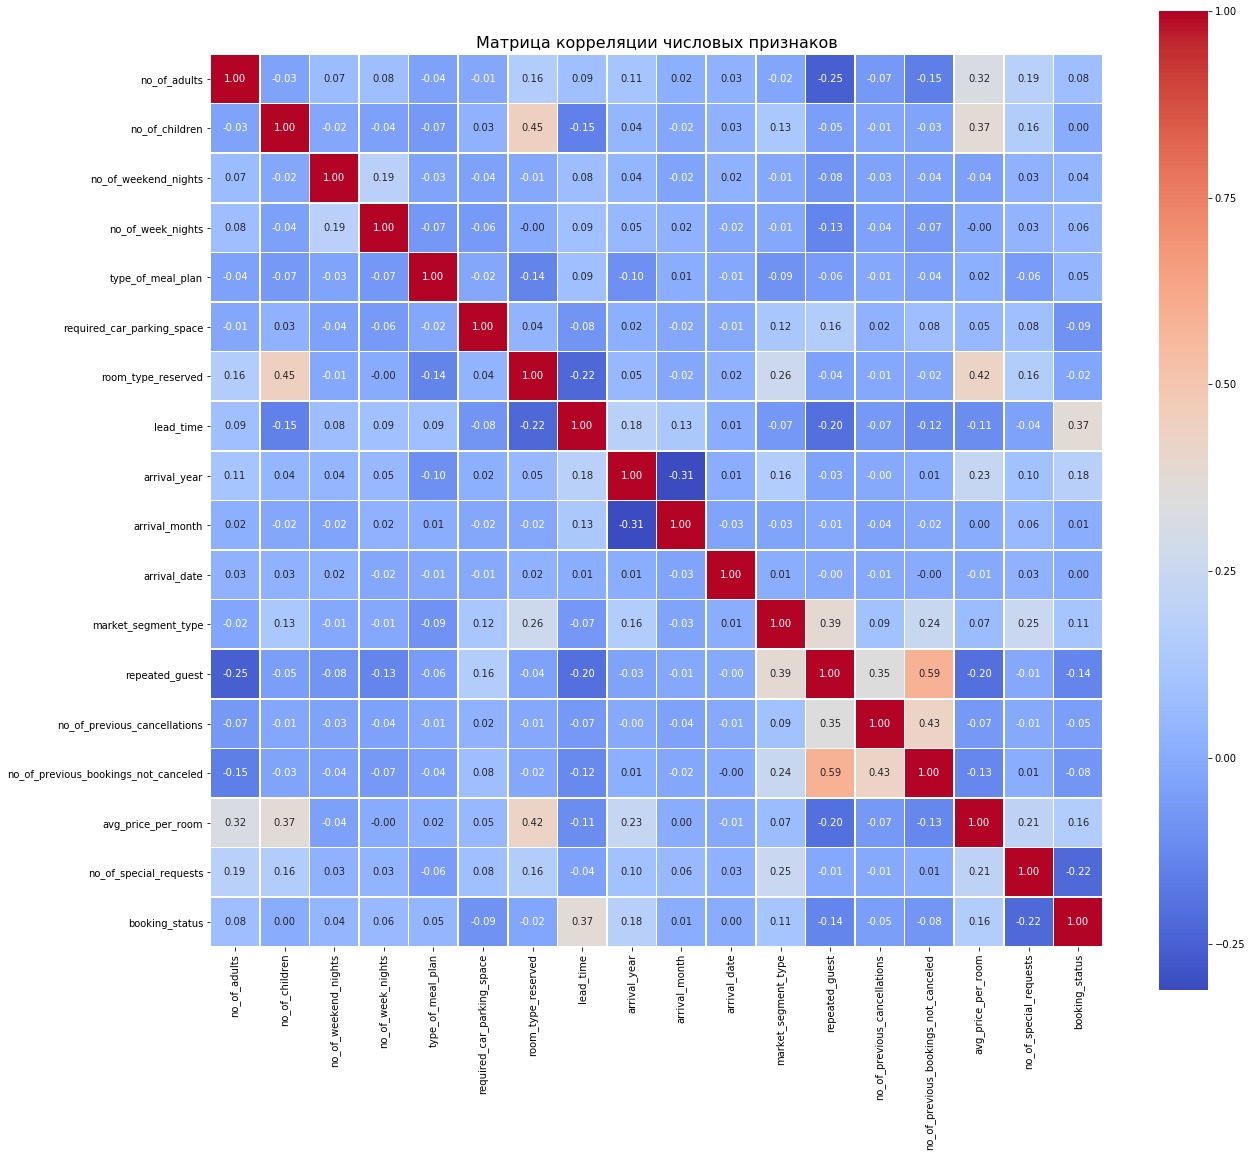

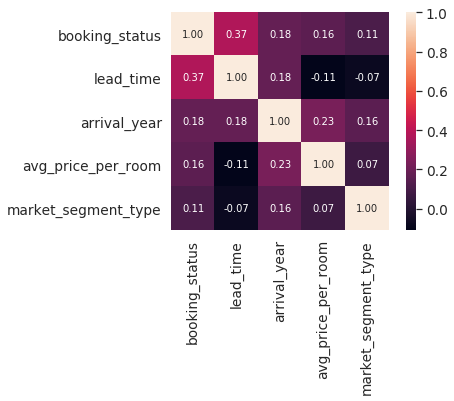

In [7]:
numeric_df = df.select_dtypes(include=[np.number])

# Вычисляем матрицу корреляции на числовых данных
corr_matrix = numeric_df.corr()

# Устанавливаем размер фигуры для тепловой карты
plt.figure(figsize=(20, 18))

# Построение тепловой карты корреляции с аннотациями
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',annot_kws={'size': 10}, square=True, linewidths=.5)

# Добавляем заголовок
plt.title('Матрица корреляции числовых признаков', fontsize=16)

# Отображаем график
plt.show()
k = 5 # количество коррелирующих признаков, которое мы хотим увидеть
cols = corr_matrix.nlargest(k, 'booking_status')['booking_status'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, 
                 fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## Напишем функцию для поиска сильно коррелированных признаков и из двух выберем тот, у которого выше корреляция с таргетом

In [8]:
def find_strong_correlations(df, feature_list, target='booking_status', threshold=0.5):

    # Списки для хранения результатов
    features_with_high_corr = []
    features_to_add = []
    pairs = set()
    # Перебираем все пары признаков из двух списков
    for f1 in feature_list:
        for f2 in feature_list:
            # Чтобы не сравнивать признак с самим собой
            if f1 != f2 and target not in [f1, f2] and (f1, f2) not in pairs and (f2, f1) not in pairs:
                # Если корреляция между признаками больше порога
                if abs(corr_matrix.loc[f1, f2]) > threshold:
                    # Находим корреляцию с целевым признаком 'booking_status'
                    corr_f1_target = abs(corr_matrix.loc[f1, target])
                    corr_f2_target = abs(corr_matrix.loc[f2, target])

                    # Добавляем в список тот признак, который сильнее коррелирует с 'booking_status'
                    if corr_f1_target > corr_f2_target:
                        features_with_high_corr.append(f1)
                        features_to_add.append(f2)
                    else:
                        features_with_high_corr.append(f2)
                        features_to_add.append(f1)
                pairs.add((f1, f2))

    # Возвращаем два списка: признаки с высокой корреляцией с 'booking_status' и оставшиеся признаки
    return features_with_high_corr, features_to_add

## Удаление некоторых признаков из списка
- признак 'no_of_previous_bookings_not_canceled' удаляется из списка признаков, так как имеет коэф. корреляции 0.59 c признаком 'repeated_guest', но признак 'repeated_guest' имеет более высокий коэф. корреляции с 'booking_status'


Признаки с сильной корреляцией с booking_status: ['repeated_guest']
Оставшиеся признаки из пары (с более слабой корреляцией): ['no_of_previous_bookings_not_canceled']


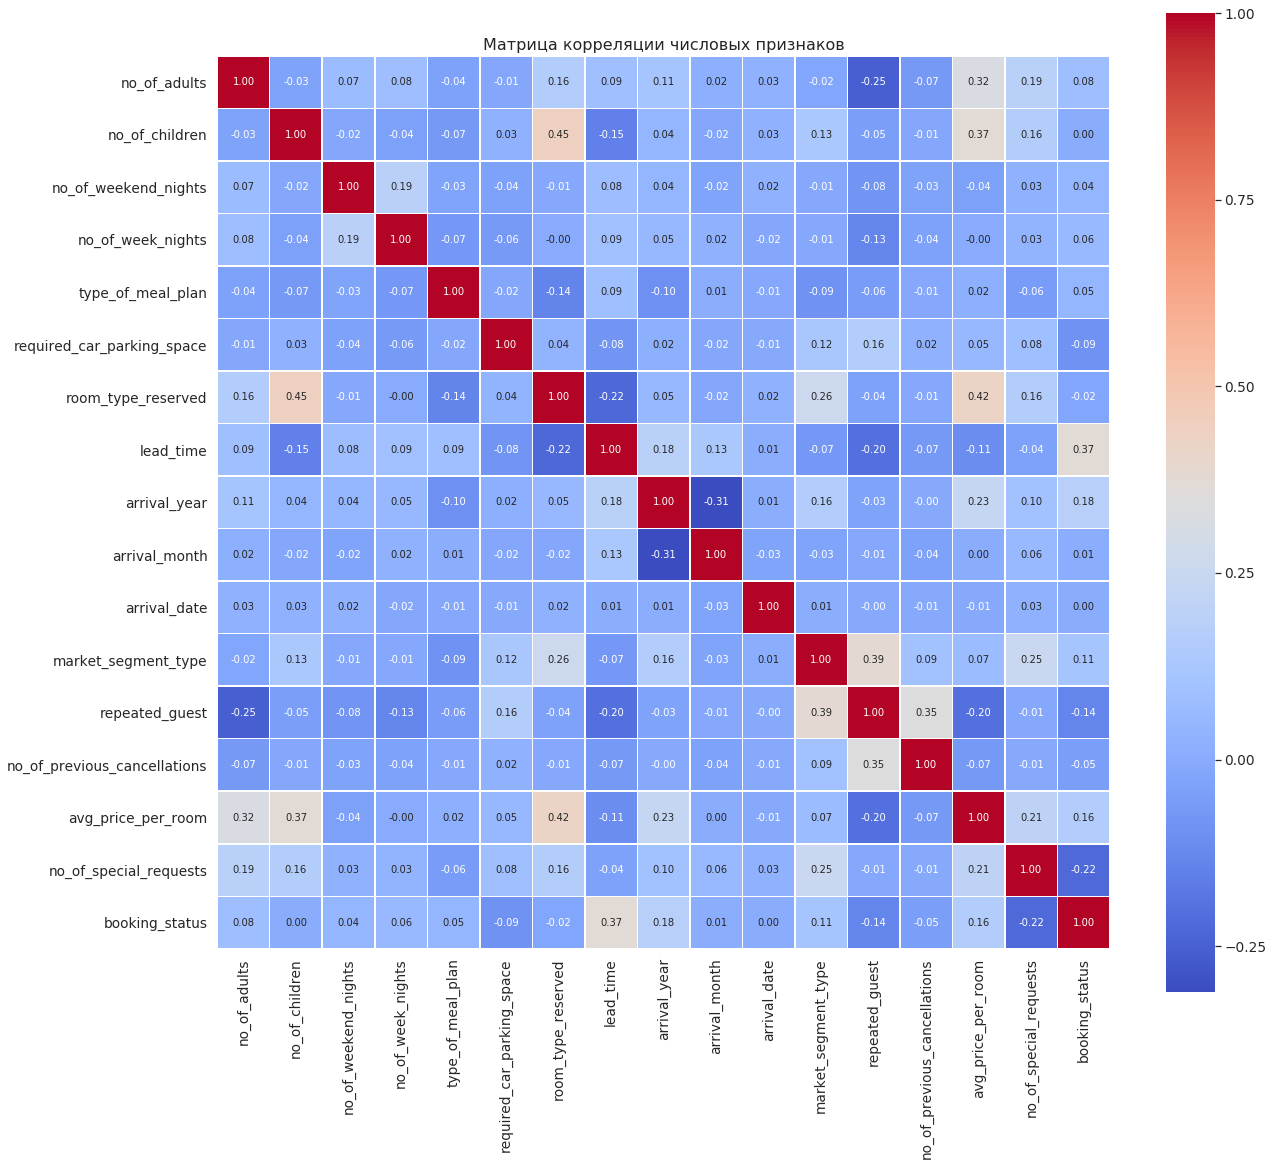

In [9]:
feature_num = list(df.select_dtypes(include=[np.number]).columns)
high_corr_features, other_features = find_strong_correlations(df, feature_num)

print("Признаки с сильной корреляцией с booking_status:", high_corr_features)
print("Оставшиеся признаки из пары (с более слабой корреляцией):", other_features)

df = df.drop(columns=other_features)

# Обновляем список числовых признаков после удаления
feature_num = list(df.select_dtypes(include=[np.number]).columns)

# Рассчитываем корреляцию между оставшимися признаками
selected_df = df[feature_num]
corr_matrix = selected_df.corr()

plt.figure(figsize=(20, 18))

# Построение тепловой карты корреляции с аннотациями
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={'size': 10}, square=True, linewidths=.5)

# Добавляем заголовок
plt.title('Матрица корреляции числовых признаков', fontsize=16)

# Отображаем график
plt.show()

# Корреляция числовых признаков с booking_status

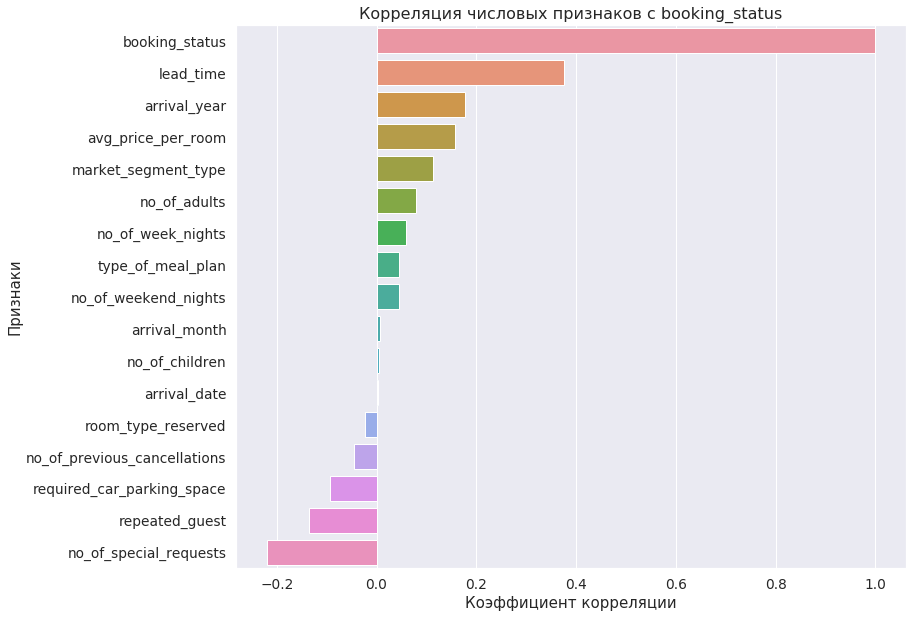

In [10]:
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
# Дополнительно: Вывод наиболее коррелированных признаков с целевой переменной
plt.figure(figsize=(12, 10))
# Сортируем по корреляции с booking_status
top_corr = corr_matrix['booking_status'].sort_values(ascending=False)
sns.barplot(x=top_corr.values, y=top_corr.index)
plt.title('Корреляция числовых признаков с booking_status', fontsize=16)
plt.xlabel('Коэффициент корреляции')
plt.ylabel('Признаки')
plt.show()

Точность модели: 0.80


,id,actual_status,predicted_status,probability_cancel
id,,,,
8768,8768,0,0,0.059897
38340,38340,1,1,0.915163
7104,7104,0,0,0.206322
36898,36898,0,0,0.085725
9747,9747,0,0,0.188082
21666,21666,0,0,0.117146
7624,7624,0,1,0.793672
35051,35051,0,0,0.217005
37073,37073,1,1,0.810488


AUC: 0.86


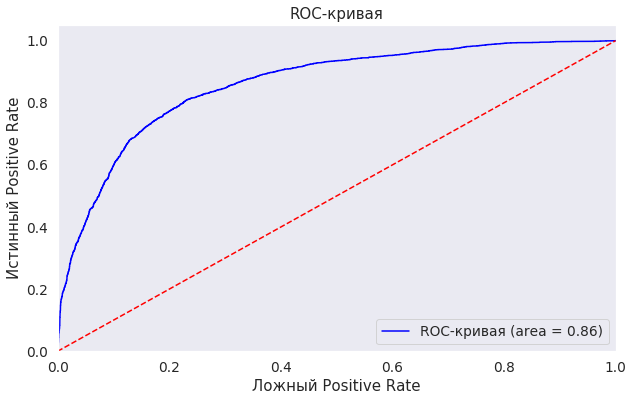

Матрица ошибок:


array([[4413,  737],
       [ 987, 2283]])

Отчёт классификации:


,f1-score,precision,recall,support
0,0.836588,0.817222,0.856893,5150.0
1,0.725914,0.755960,0.698165,3270.0
micro avg,0.795249,0.795249,0.795249,8420.0
macro avg,0.781251,0.786591,0.777529,8420.0
weighted avg,0.793606,0.793430,0.795249,8420.0


In [11]:
# Кодирование целевой переменной
df['booking_status'] = df['booking_status'].astype('int')  # Убедитесь, что статус отмены - это 0 или 1

# Определение признаков и целевой переменной
X = df.drop(['booking_status'], axis=1)  # Исключим ненужные колонки
y = df['booking_status']

# Приведение признаков к типу float
X = X.astype(float)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(
    X, y, df.index.values, test_size=0.2, random_state=42
)

# Масштабирование признаков
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Обучение модели SVM
model = SVC(probability=True)  # Установите probability=True для получения вероятностей
model.fit(X_train, y_train)

# Прогнозирование статусов и их вероятностей
y_pred = model.predict(X_test)
y_probs = model.predict_proba(X_test)  # Получаем вероятности

# Создание DataFrame для вывода
output = pd.DataFrame({
    'id': indices_test,  # Используем индексы напрямую
    'actual_status': y_test,
    'predicted_status': y_pred,
    'probability_cancel': y_probs[:, 1],  # Вероятность отмены
})


# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.2f}")

display(output)

# AUC для ROC-кривой
y_probs_positive = y_probs[:, 1]
roc_auc = roc_auc_score(y_test, y_probs_positive)
print(f"AUC: {roc_auc:.2f}")

# Построение ROC-кривой
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC-кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ложный Positive Rate')
plt.ylabel('Истинный Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Матрица ошибок
cm = confusion_matrix(y_test, y_pred)
print("Матрица ошибок:")
display(cm)

# Отчет классификации
print("Отчёт классификации:")
cr = classification_report(y_test, y_pred, output_dict=True)
df = pd.DataFrame(cr).T
display(df)


<!DOCTYPE html>
<html lang="ru">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Прогнозирование вероятности отмены бронирования</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            line-height: 1.6;
            margin: 20px;
        }
        h1, h2 {
            text-align: center;
        }
    </style>
</head>
<body>

<center>
    <h1>Прогнозирование вероятности отмены бронирования</h1>
    <h2>Метод опорных векторов</h2>
</center>

<p>Метод опорных векторов (Support Vector Machines или просто SVM) — мощный и универсальный набор алгоритмов для работы с данными любой формы, применяемый не только для задач классификации и регрессии, но и также для выявления аномалий.</p>

<h3>Шаг 1: Формулировка задачи</h3>
<p>Задача состоит в том, чтобы предсказать вероятность определенного события на основе набора характеристик. В нашем случае, это задача предсказания вероятности отмены бронирования на основе таких показателей, как:</p>
<ul>
    <li>no_of_adults - количество взрослых</li>
    <li>no_of_children - количество детей</li>
    <li>no_of_weekend_nights - количество ночей в выходные</li>
    <li>no_of_week_nights - количество ночей в будние дни</li>
    <li>type_of_meal_plan - тип плана питания</li>
    <li>required_car_parking_space - требуемое место для парковки автомобиля</li>
    <li>room_type_reserved - забронированный тип номера</li>
    <li>lead_time - время до заезда (лид-тайм)</li>
    <li>arrival_year - год прибытия</li>
    <li>arrival_month - месяц прибытия</li>
    <li>arrival_date - дата прибытия</li>
    <li>market_segment_type - тип рыночного сегмента</li>
    <li>repeated_guest - повторный гость (да/нет)</li>
    <li>no_of_previous_cancellations - количество предыдущих отмен</li>
    <li>no_of_previous_bookings_not_canceled - количество предыдущих бронирований, не отмененных</li>
    <li>avg_price_per_room - средняя цена за номер</li>
    <li>no_of_special_requests - количество специальных запросов</li>
</ul>

<h3>Шаг 2: Подготовка данных</h3>
<ol>
    <li>
        <strong>Сбор данных:</strong> Сбор необходимых данных для задачи классификации или регрессии.
    </li>
    <li>
        <strong>Предобработка:</strong> Очистка данных от пропусков, шумов и выбросов. Преобразование категориальных признаков в числовые (один из методов — кодирование через One-Hot).
    </li>
    <li>
        <strong>Нормализация:</strong> Приведение признаков к одному масштабу (обычно это делается через стандартизацию или масштабирование), чтобы SVM работал более эффективно.
    </li>
</ol>

<h3>Шаг 3: Разделение данных на обучающую и тестовую выборки</h3>
<p>Чаще всего данные делятся на две части: обучающую (например, 70-80% данных) и тестовую выборку (20-30%). Это позволяет оценивать производительность модели на новых данных.</p>

<h3>Шаг 4:  Выбор ядра</h3>
<p>SVM может использовать различные функции ядра для разделения классов. Выбор ядра зависит от характера данных:</p>
<ul>
    <li><strong>Линейное ядро:</strong> Используется, когда данные линейно разделимы.</li>
    <li><strong>Полиномиальное ядро:</strong> Применяется для более сложных сценариев.</li>
    <li><strong>Радиально-базисное ядро (RBF):</strong> Подходит для нелинейных данных.</li>
</ul>
<p>Протестируйте различные ядра, чтобы определить, какое из них лучше справляется с вашей задачей.</p>

<h3>Шаг 5: Обучение модели</h3>
<p>Использование обучающей выборки для обучения модели. Это включает оптимизацию весов и смещения для нахождения гиперплоскости максимального разделения. Алгоритм часто использует метод градиентного спуска или другие итеративные методы для минимизации функции потерь (например, hinge loss).</p>

<h3>Шаг 6: Настройка гиперпараметров</h3>
<ul>
    <li><strong>C (параметр регуляризации):</strong> Контролирует баланс между максимизацией ширины границы и минимизацией ошибки классификации. Это может влиять на переобучение.</li>
    <li><strong>Параметры ядра:</strong> Например, для RBF ядра — gamma, который влияет на радиус влияния отдельных образцов.</li>
</ul>

<h3>Шаг 7: Оценка модели</h3>
<p>Применение обученной модели к тестовой выборке для предсказания классов. Использование метрик оценки, таких как:</p>
<ul>
    <li>Точность (Accuracy)</li>
    <li>Полнота (Recall)</li>
    <li>Точность (Precision)</li>
    <li>F1-мера</li>
    <li>ROC-кривая и AUC (для бинарных классификаторов)</li>
</ul>

</body>
</html>


## Результаты выполнения задачи

Мы провели исследовательский анализ данных (EDA), предварительную обработку данных, построили и оценили модель SVM. Вот ключевые моменты:

### EDA

- Был проведен анализ и визуализация данных о бронировании.
- Было определено отсутствие пустых ячеек в таблице.
- Была произведена фильтрация категориальных признаков.

### Предварительная обработка данных

- Некоторые категориальные признаки были удалены для лучшей обучаемости модели.
- Признаки были маштабированы для улучшения качества модели.
- Данные были разделены на обучающий и тестовый наборы.

### Построение модели

- Модель была обучена на обучающем наборе данных.
- На тестовом наборе данных была достигнута точность 0.8.
- Матрица ошибок показывает, что модель хорошо справляется с классификацией отмены бронирования.

